In [71]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec

from gwbird import pls
from gwbird.overlap import Response
from gwbird.nell import AngularResponse, Sensitivity_ell
from gwbird import nell

%config InlineBackend.figure_format = 'retina'


plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example file for LIGO

* Response (Overlap Reduction function)

In [72]:
f = np.logspace(np.log10(3), np.log10(1000), 1000)

print('Calculating Overlaps LIGO H - LIGO L')
print('- tensor modes')
R_t_LIGO = Response.overlap('LIGO H', 'LIGO L', f, 0, 't', None)
print('- vector modes')
R_v_LIGO = Response.overlap('LIGO H', 'LIGO L', f, 0, 'v', None)
print('- scalar modes')
R_s_LIGO = Response.overlap('LIGO H', 'LIGO L', f, 0, 's', None)

Calculating Overlaps LIGO H - LIGO L
- tensor modes
- vector modes
- scalar modes


Text(0.5, 1.0, 'LIGO Response')

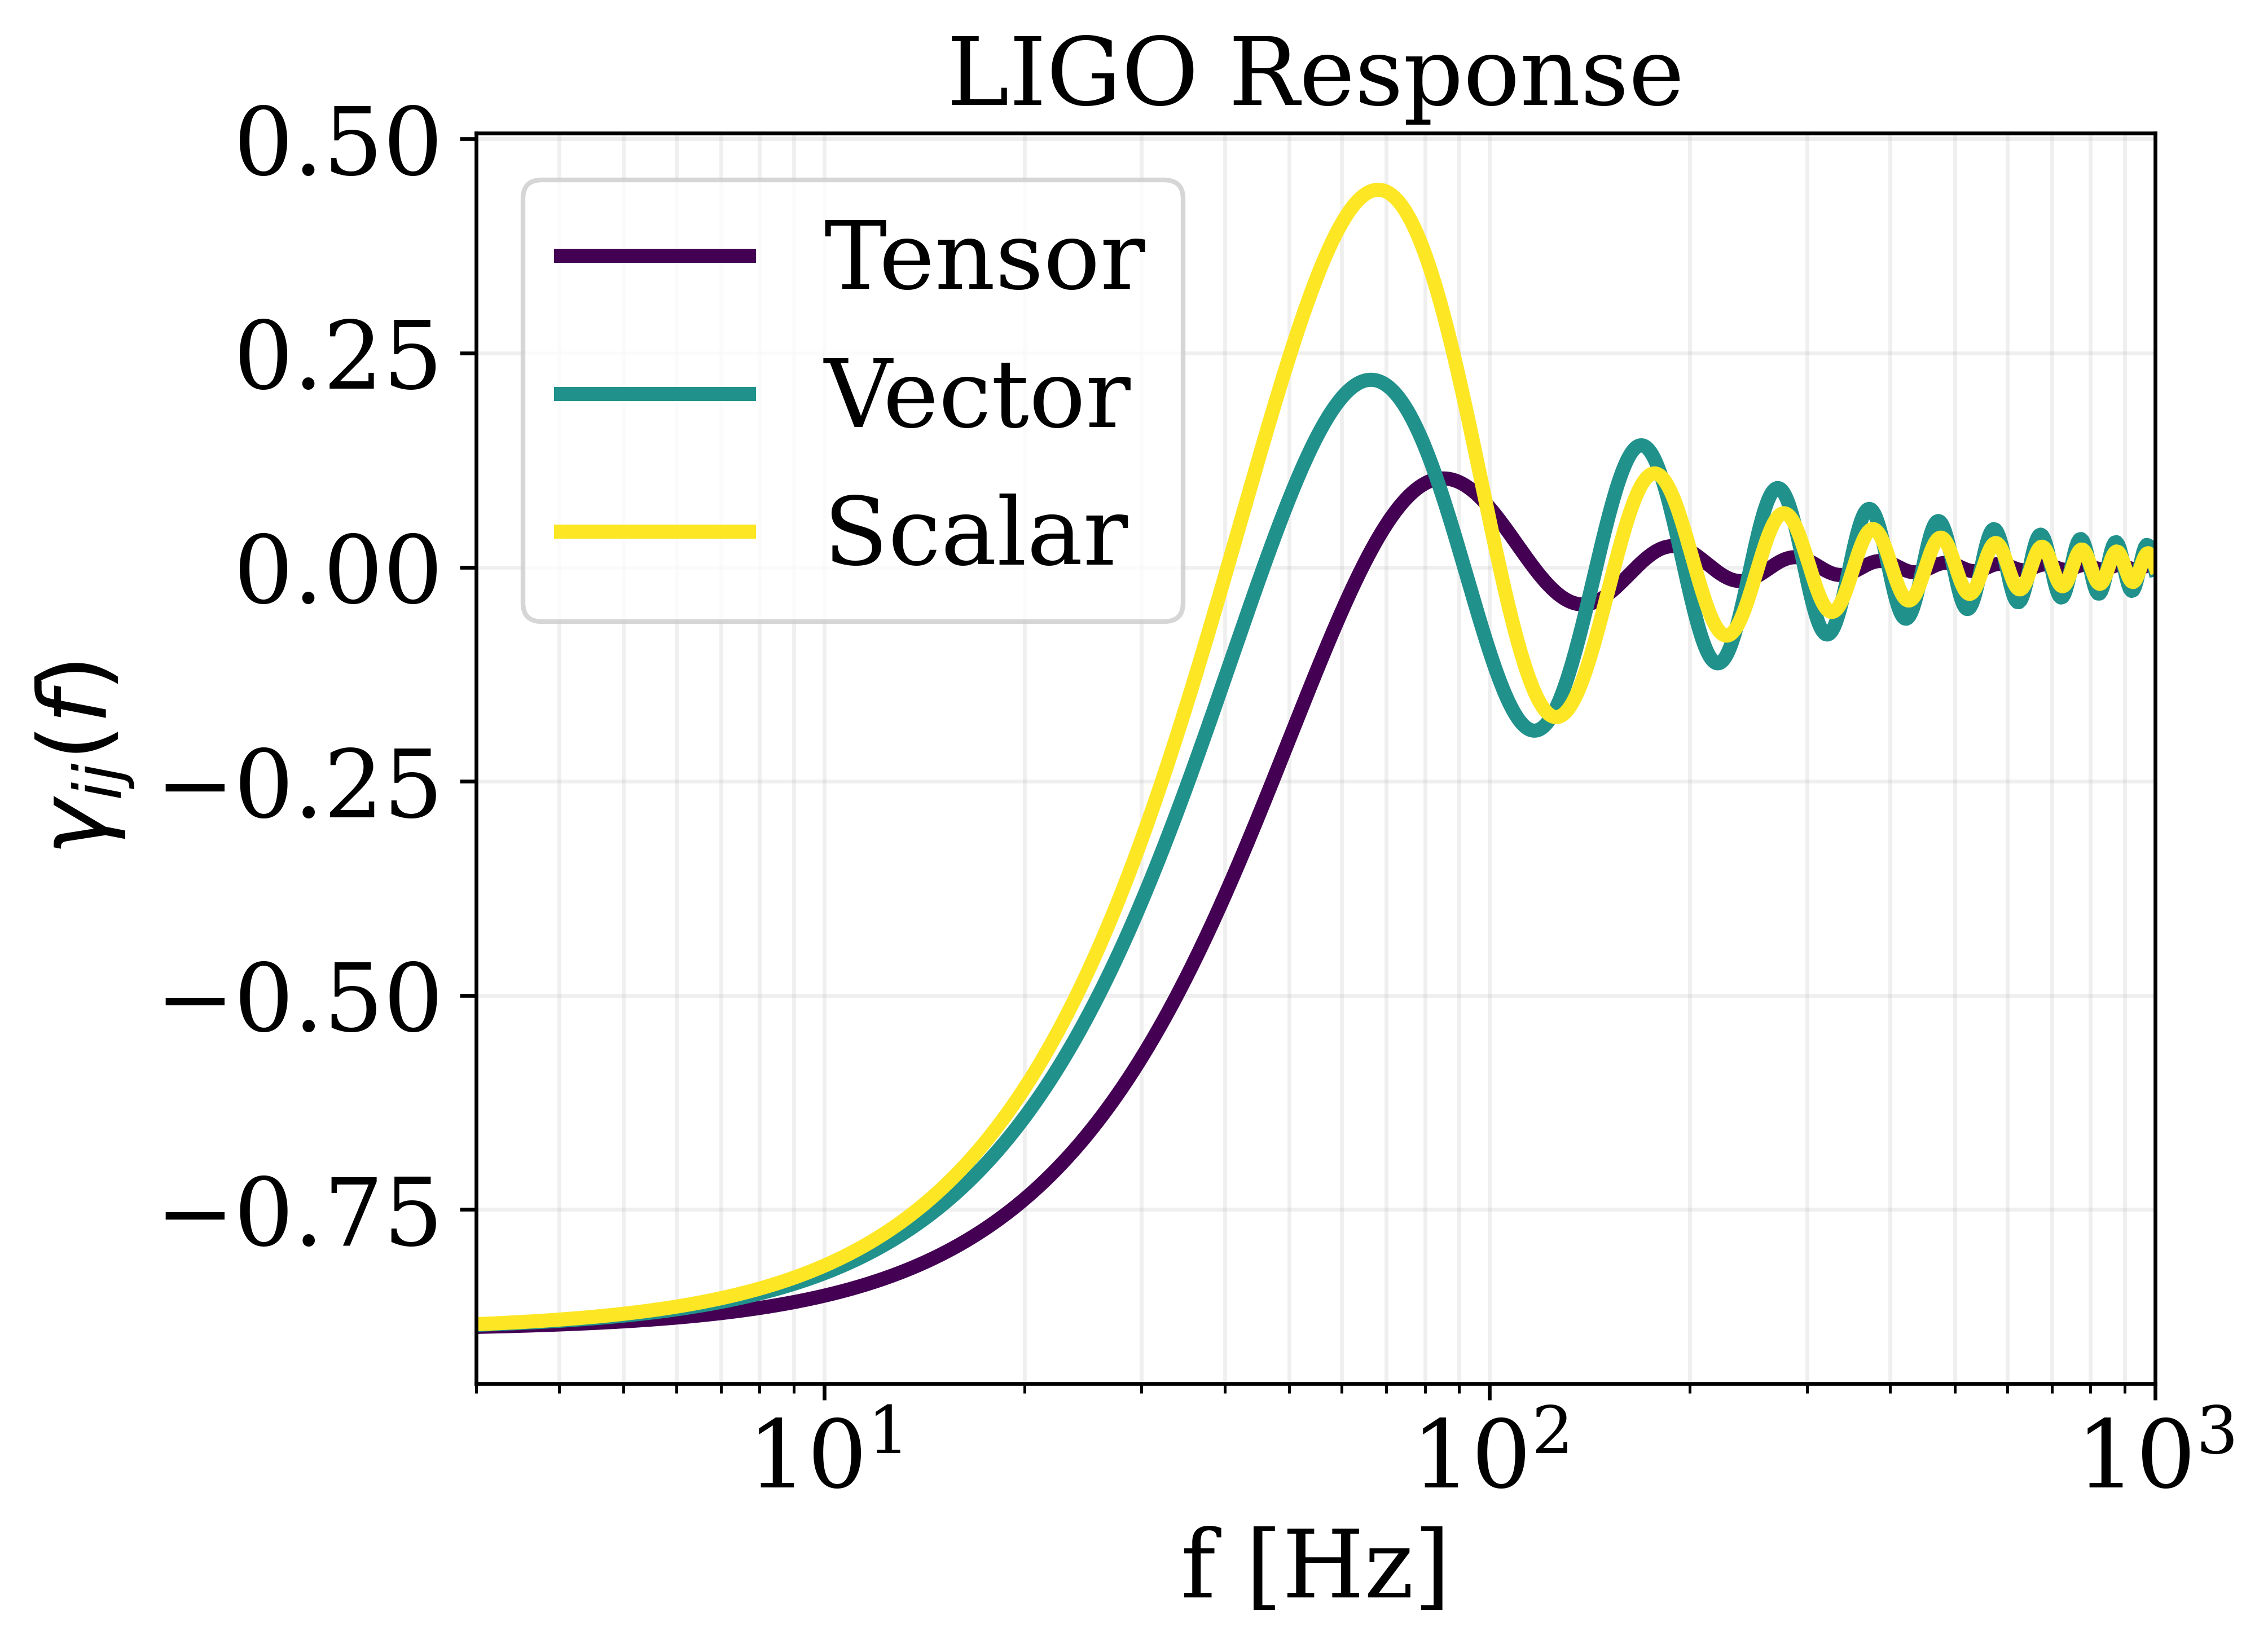

In [73]:
colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, R_t_LIGO, label='Tensor', color = colors[0], rasterized=True) 
plt.plot(f, R_v_LIGO, label='Vector', color = colors[1], rasterized=True)
plt.plot(f, R_s_LIGO, label='Scalar', color = colors[2], rasterized=True)
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\gamma_{ij}(f)$')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()
plt.title('LIGO Response')

* Power Law Integrated Sensitivity Curve

(3, 1000)

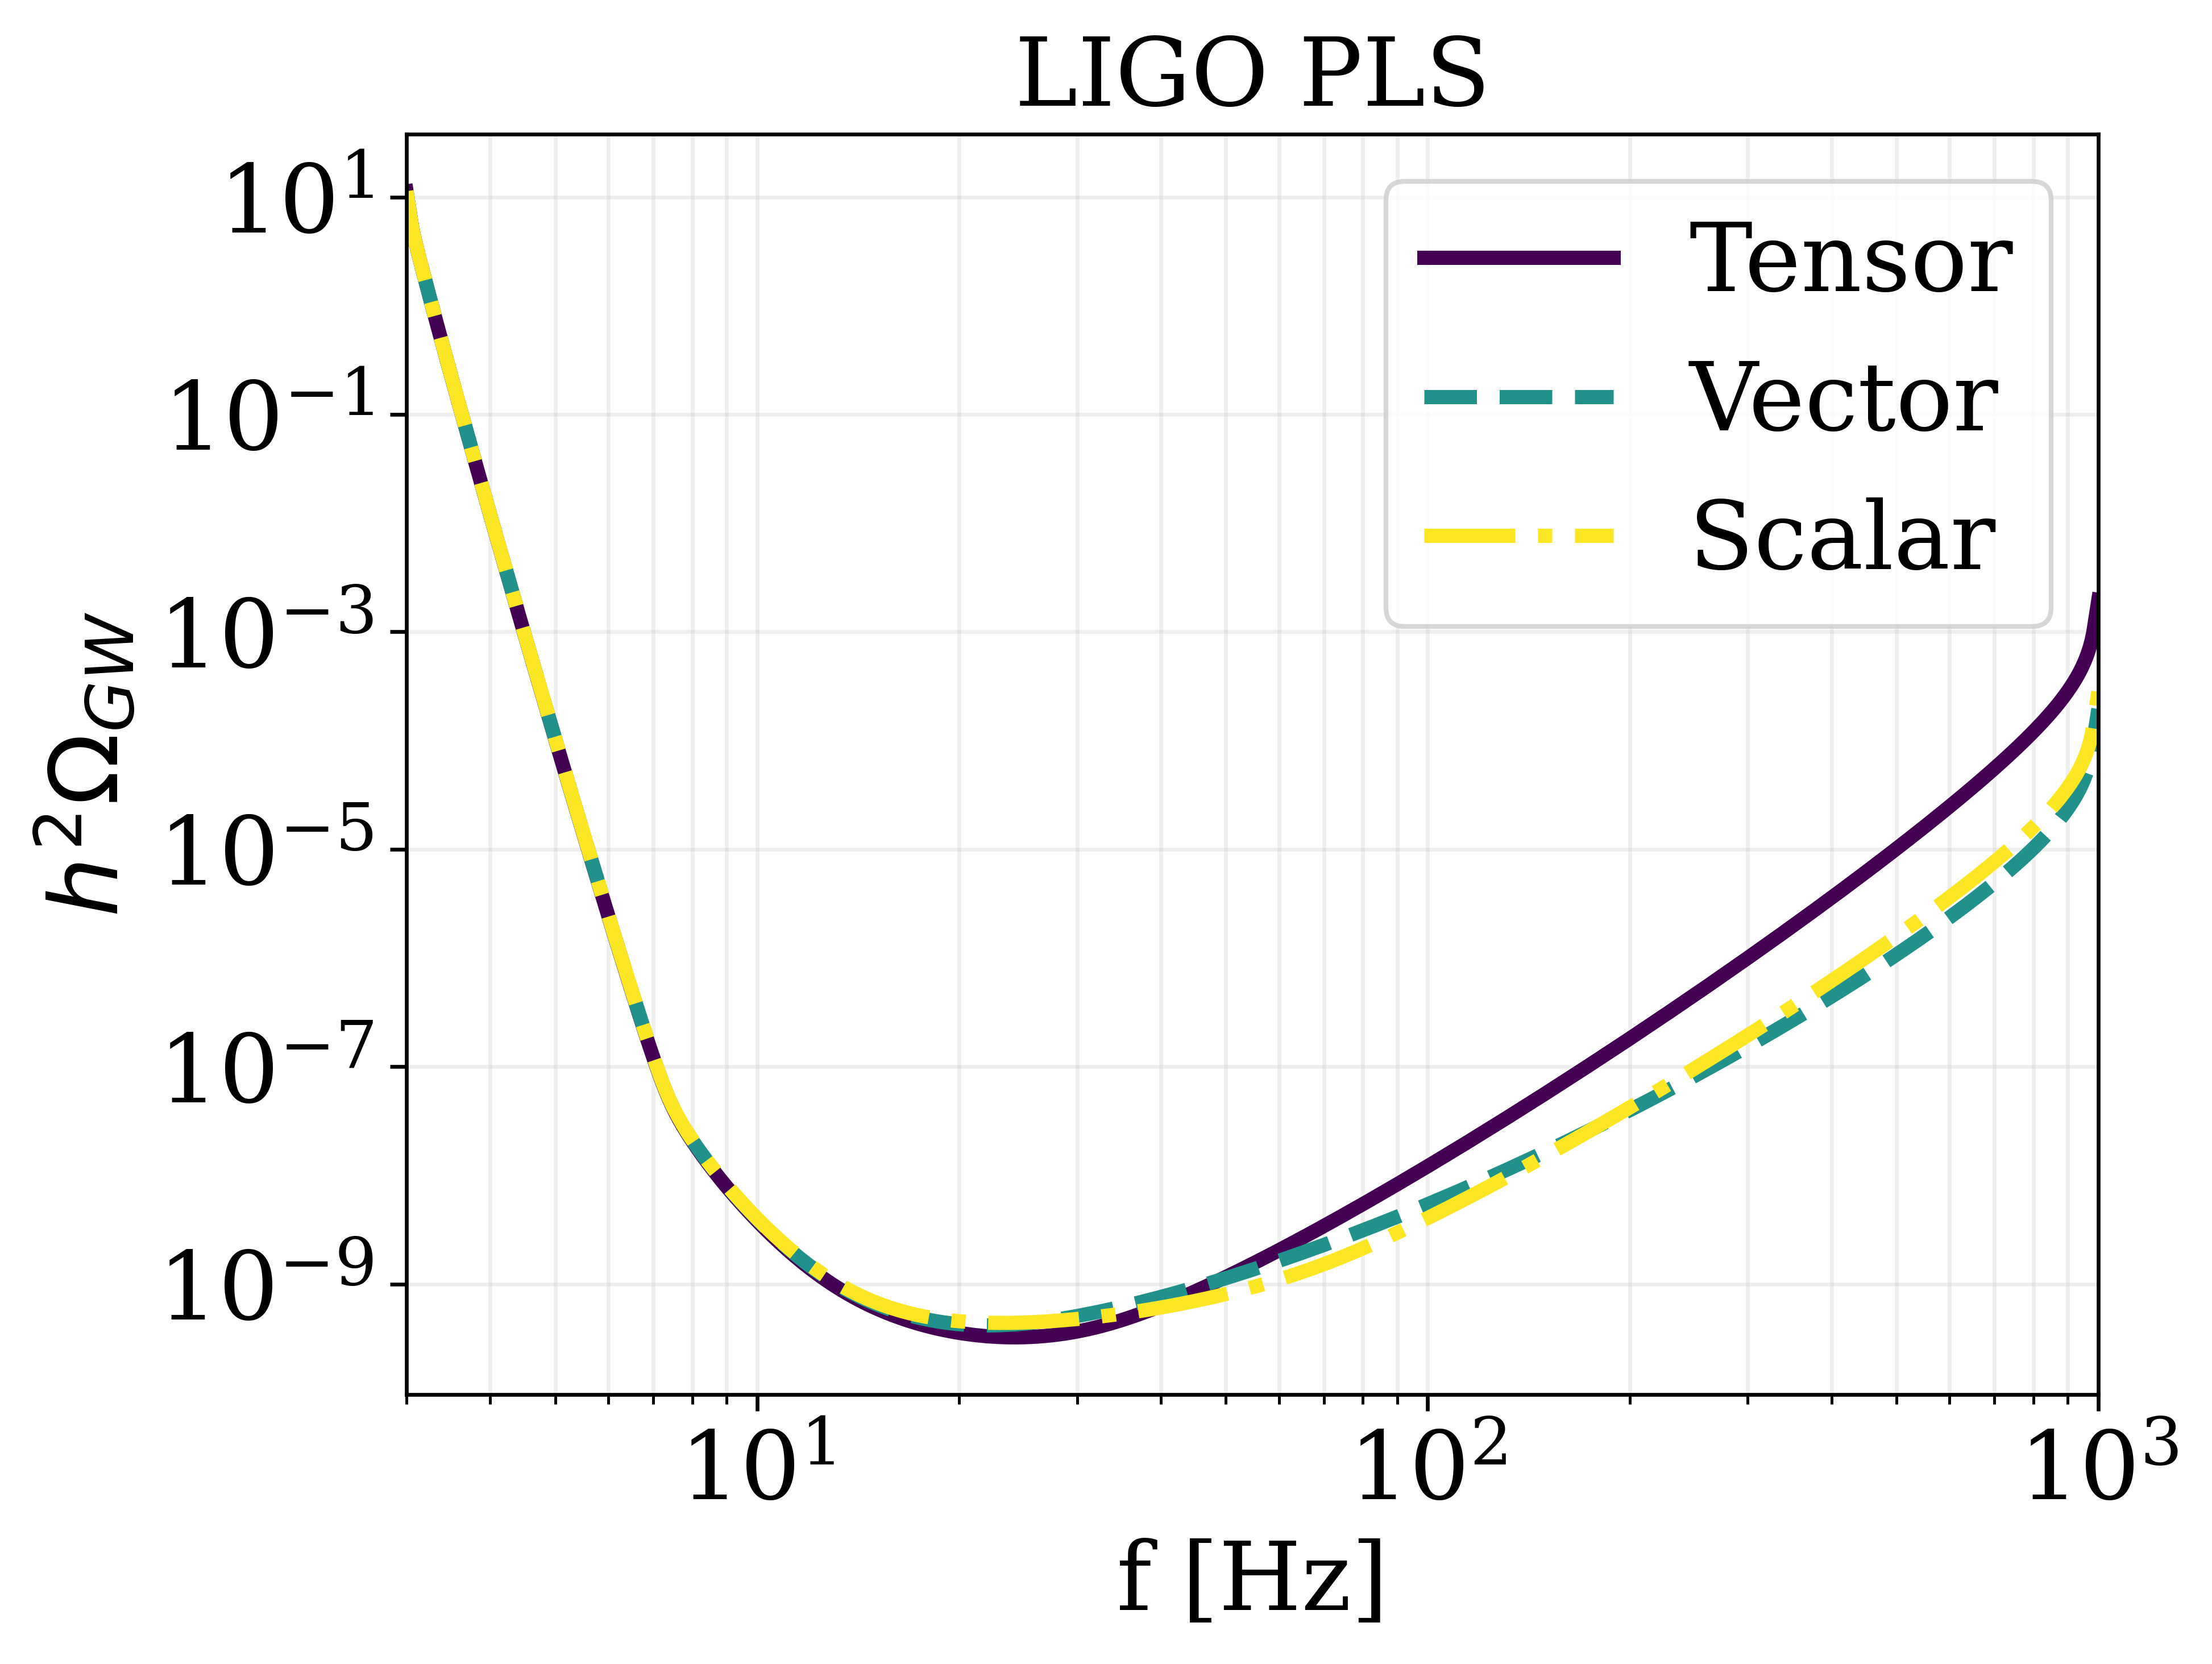

In [75]:
fref = 25
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_LIGO_t = pls.PLS('LIGO H', 'LIGO L', f, fref, 't', snr, Tobs, beta_min, beta_max, None)
pls_LIGO_v = pls.PLS('LIGO H', 'LIGO L', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_LIGO_s = pls.PLS('LIGO H', 'LIGO L', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_LIGO_t, label='Tensor', color=colors[0], rasterized=True)
plt.plot(f, pls_LIGO_v, label='Vector', color=colors[1], linestyle='--', rasterized=True)
plt.plot(f, pls_LIGO_s, label='Scalar', color=colors[2], linestyle='-.', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title('LIGO PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()
plt.xlim(3, 1000)


In [77]:
print(np.min(pls_LIGO_t))
print(np.min(pls_LIGO_v))
print(np.min(pls_LIGO_s))

3.242619946649391e-10
4.173707449369712e-10
4.400374441077009e-10


* Angular Response

In [78]:
print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t_LIGO = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R0_v_LIGO = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R0_s_LIGO = AngularResponse.R_ell(0, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)

print('Calculating Angular response for the dipole...')   
print('- tensor modes')
R1_t_LIGO = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R1_v_LIGO = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R1_s_LIGO = AngularResponse.R_ell(1, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)

print('Calculating Angular response for the quadrupole...')   
print('- tensor modes')
R2_t_LIGO = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R2_v_LIGO = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R2_s_LIGO = AngularResponse.R_ell(2, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)

print('Calculating Angular response for the octupole...')   
print('- tensor modes')
R3_t_LIGO = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 't', shift_angle=None)
print('- vector modes')
R3_v_LIGO = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 'v', shift_angle=None)
print('- scalar modes')
R3_s_LIGO = AngularResponse.R_ell(3, 'LIGO H', 'LIGO L', f, 's', shift_angle=None)


Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the dipole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the quadrupole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the octupole...
- tensor modes
- vector modes
- scalar modes


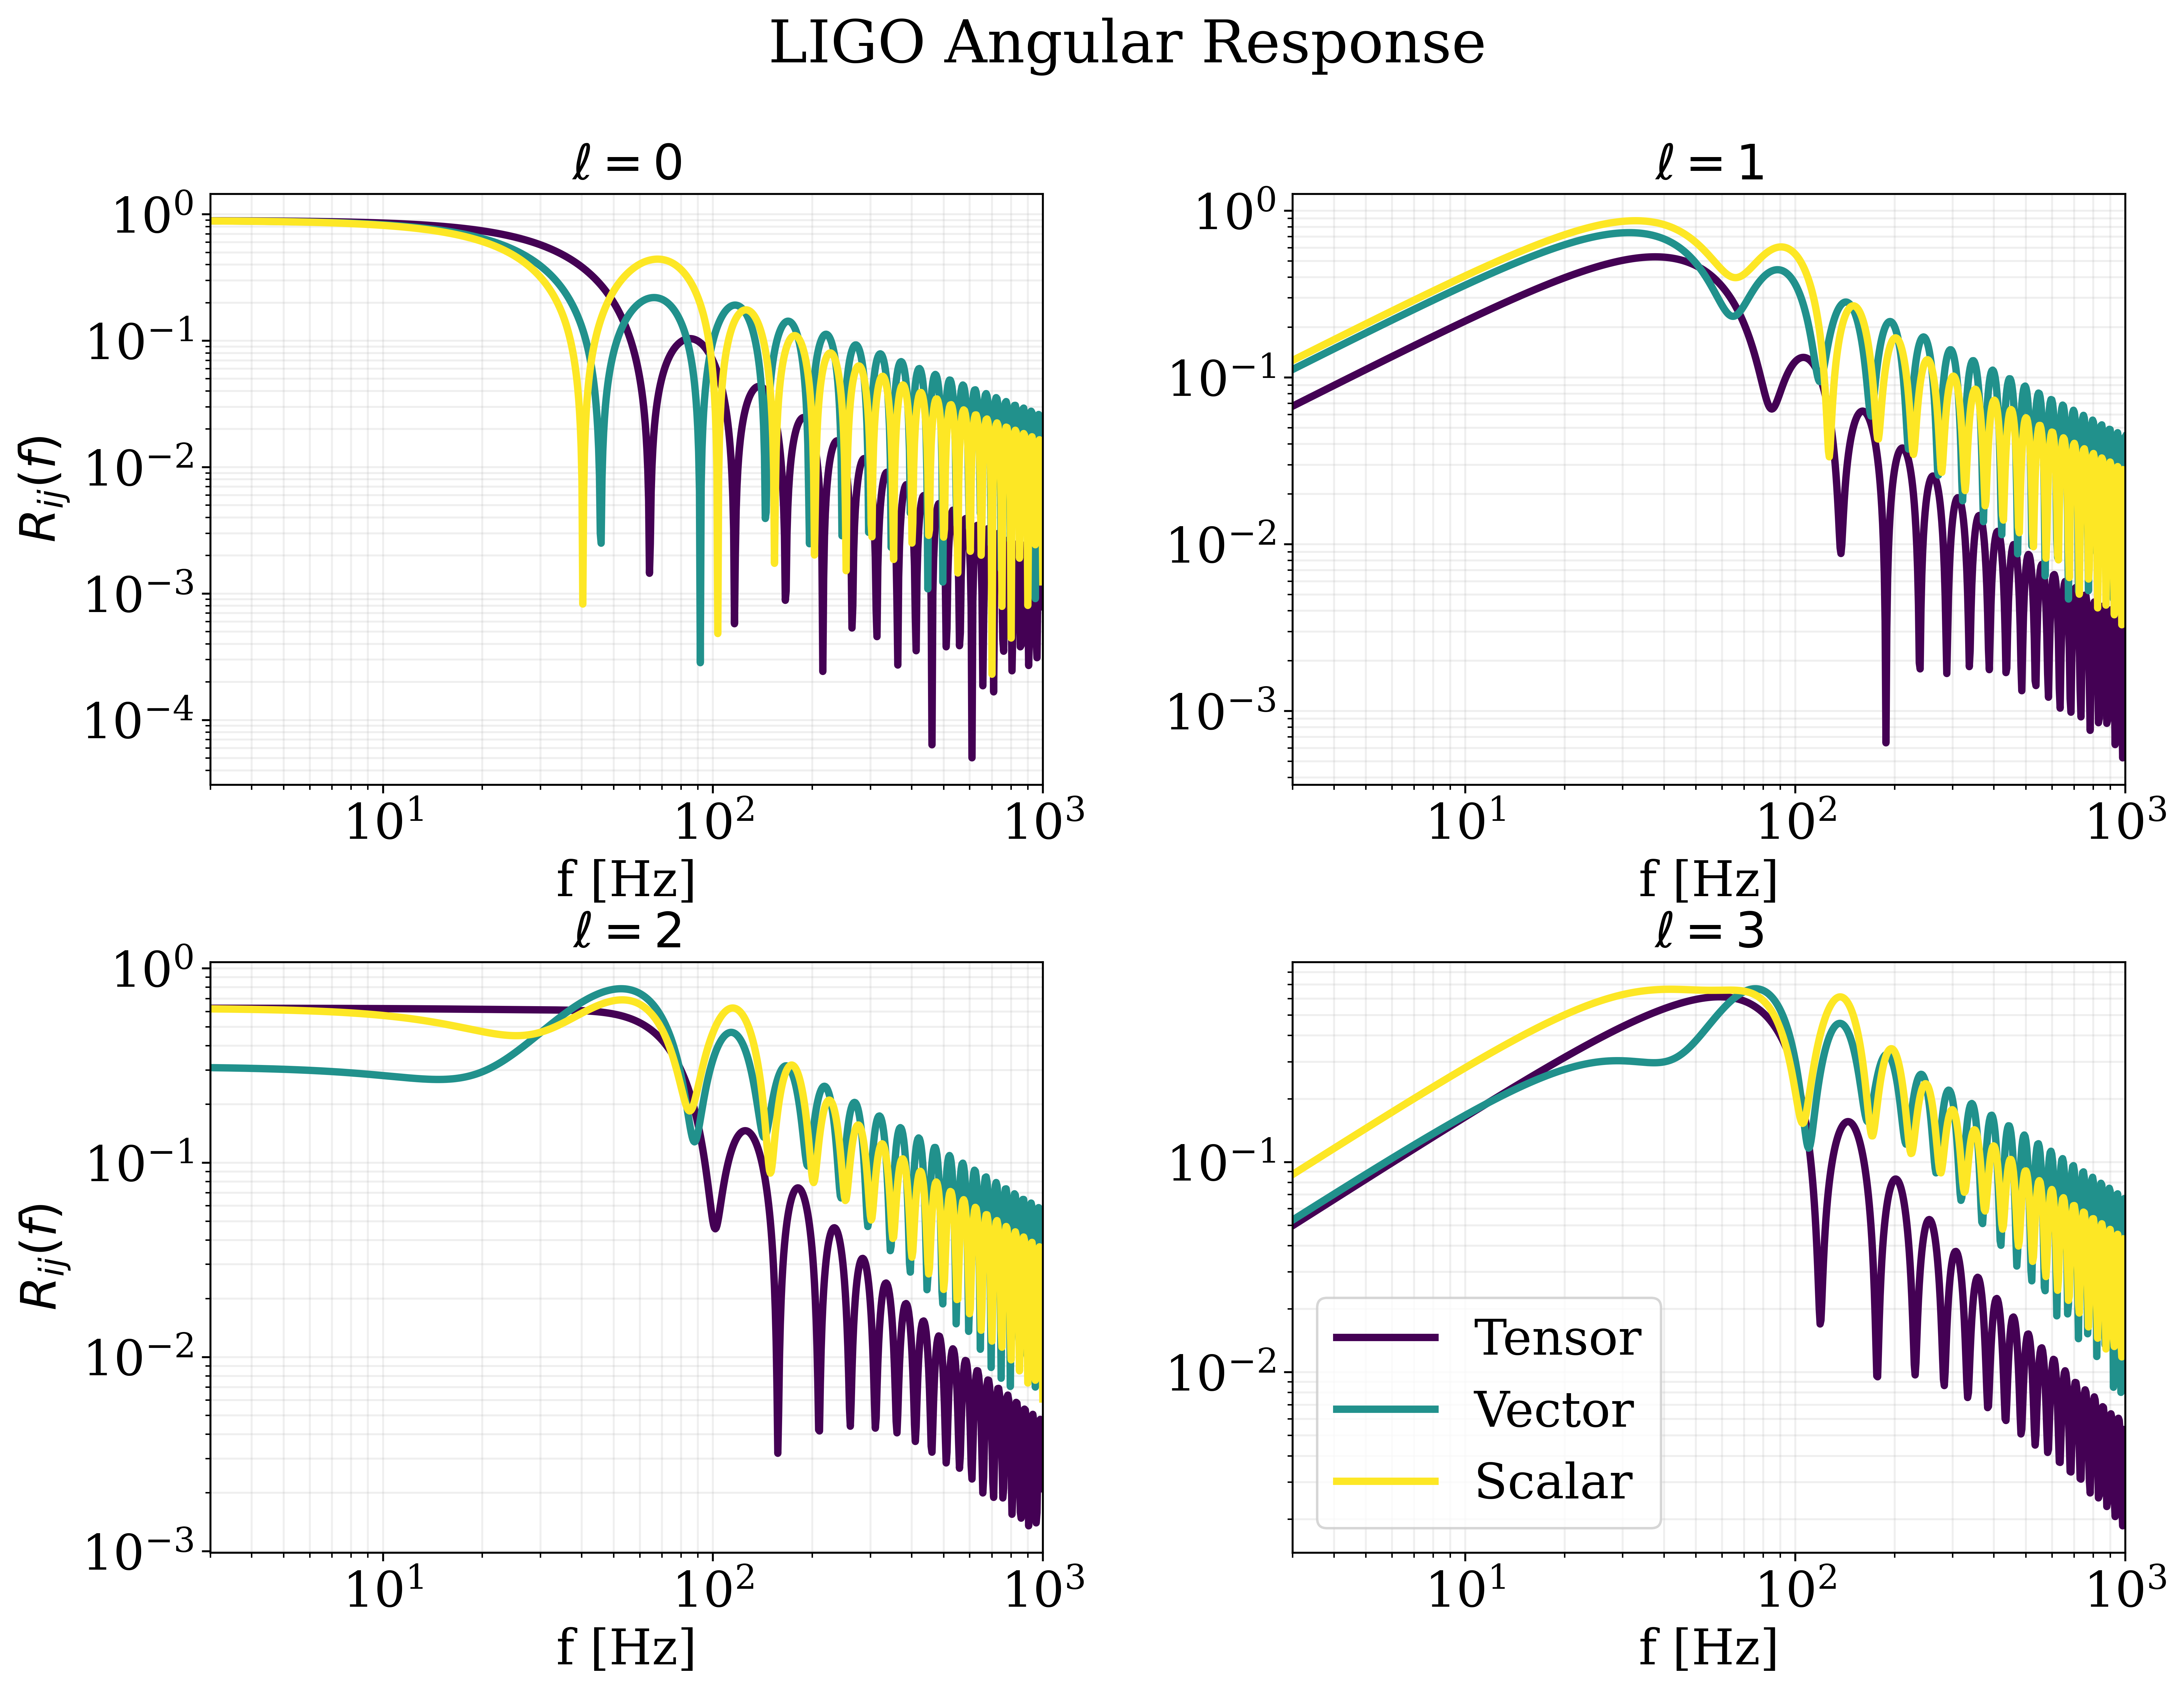

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})
colors = cm.viridis(np.linspace(0, 1, 3))
# monopole
axs[0, 0].plot(f, R0_t_LIGO, label='Tensor', color=colors[0], rasterized=True)
axs[0, 0].plot(f, R0_v_LIGO, label='Vector', color=colors[1], rasterized=True)
axs[0, 0].plot(f, R0_s_LIGO, label='Scalar', color=colors[2], rasterized=True)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('f [Hz]')
axs[0, 0].set_ylabel(r'$R_{ij}(f)$')
#axs[0, 0].legend()
axs[0, 0].grid(alpha=0.2, which='both')
axs[0, 0].set_title(r'$\ell = 0$')
axs[0, 0].set_xlim(3, 1000)

# dipole
axs[0, 1].plot(f, R1_t_LIGO, label='Tensor', color=colors[0], rasterized=True)
axs[0, 1].plot(f, R1_v_LIGO, label='Vector', color=colors[1], rasterized=True)
axs[0, 1].plot(f, R1_s_LIGO, label='Scalar', color=colors[2], rasterized=True)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('f [Hz]')
#axs[0, 1].legend()
axs[0, 1].grid(alpha=0.2, which='both')
axs[0, 1].set_title(r'$\ell = 1$')
axs[0, 1].set_xlim(3, 1000)

# quadrupole
axs[1, 0].plot(f, R2_t_LIGO, label='Tensor', color=colors[0], rasterized=True)
axs[1, 0].plot(f, R2_v_LIGO, label='Vector', color=colors[1], rasterized=True)
axs[1, 0].plot(f, R2_s_LIGO, label='Scalar', color=colors[2], rasterized=True)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('f [Hz]')
axs[1, 0].set_ylabel(r'$R_{ij}(f)$')
#axs[1, 0].legend()
axs[1, 0].grid(alpha=0.2, which='both')
axs[1, 0].set_title(r'$\ell = 2$')
axs[1, 0].set_xlim(3, 1000)

# octupole
axs[1, 1].plot(f, R3_t_LIGO, label='Tensor', color=colors[0], rasterized=True)
axs[1, 1].plot(f, R3_v_LIGO, label='Vector', color=colors[1], rasterized=True)
axs[1, 1].plot(f, R3_s_LIGO, label='Scalar', color=colors[2], rasterized=True)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('f [Hz]')
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.2, which='both')
axs[1, 1].set_title(r'$\ell = 3$')
axs[1, 1].set_xlim(3, 1000)

# Imposta il titolo principale
fig.suptitle('LIGO Angular Response ')

plt.show()

* Angular sensitivity

In [61]:
fref = 25
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

#tensor modes

pls_LIGO_t_0 = nell.PLS_l('LIGO H', 'LIGO L', R0_t_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1, 't', None)
pls_LIGO_t_1 = nell.PLS_l('LIGO H', 'LIGO L', R1_t_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)
pls_LIGO_t_2 = nell.PLS_l('LIGO H', 'LIGO L', R2_t_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)
pls_LIGO_t_3 = nell.PLS_l('LIGO H', 'LIGO L', R3_t_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)

print(np.min(pls_LIGO_t_0))
print(np.min(pls_LIGO_t_1))
print(np.min(pls_LIGO_t_2))
print(np.min(pls_LIGO_t_3))



3.242619946649391e-10
1.246397700308569e-08
9.55105061564213e-09
1.2548284780110754e-08


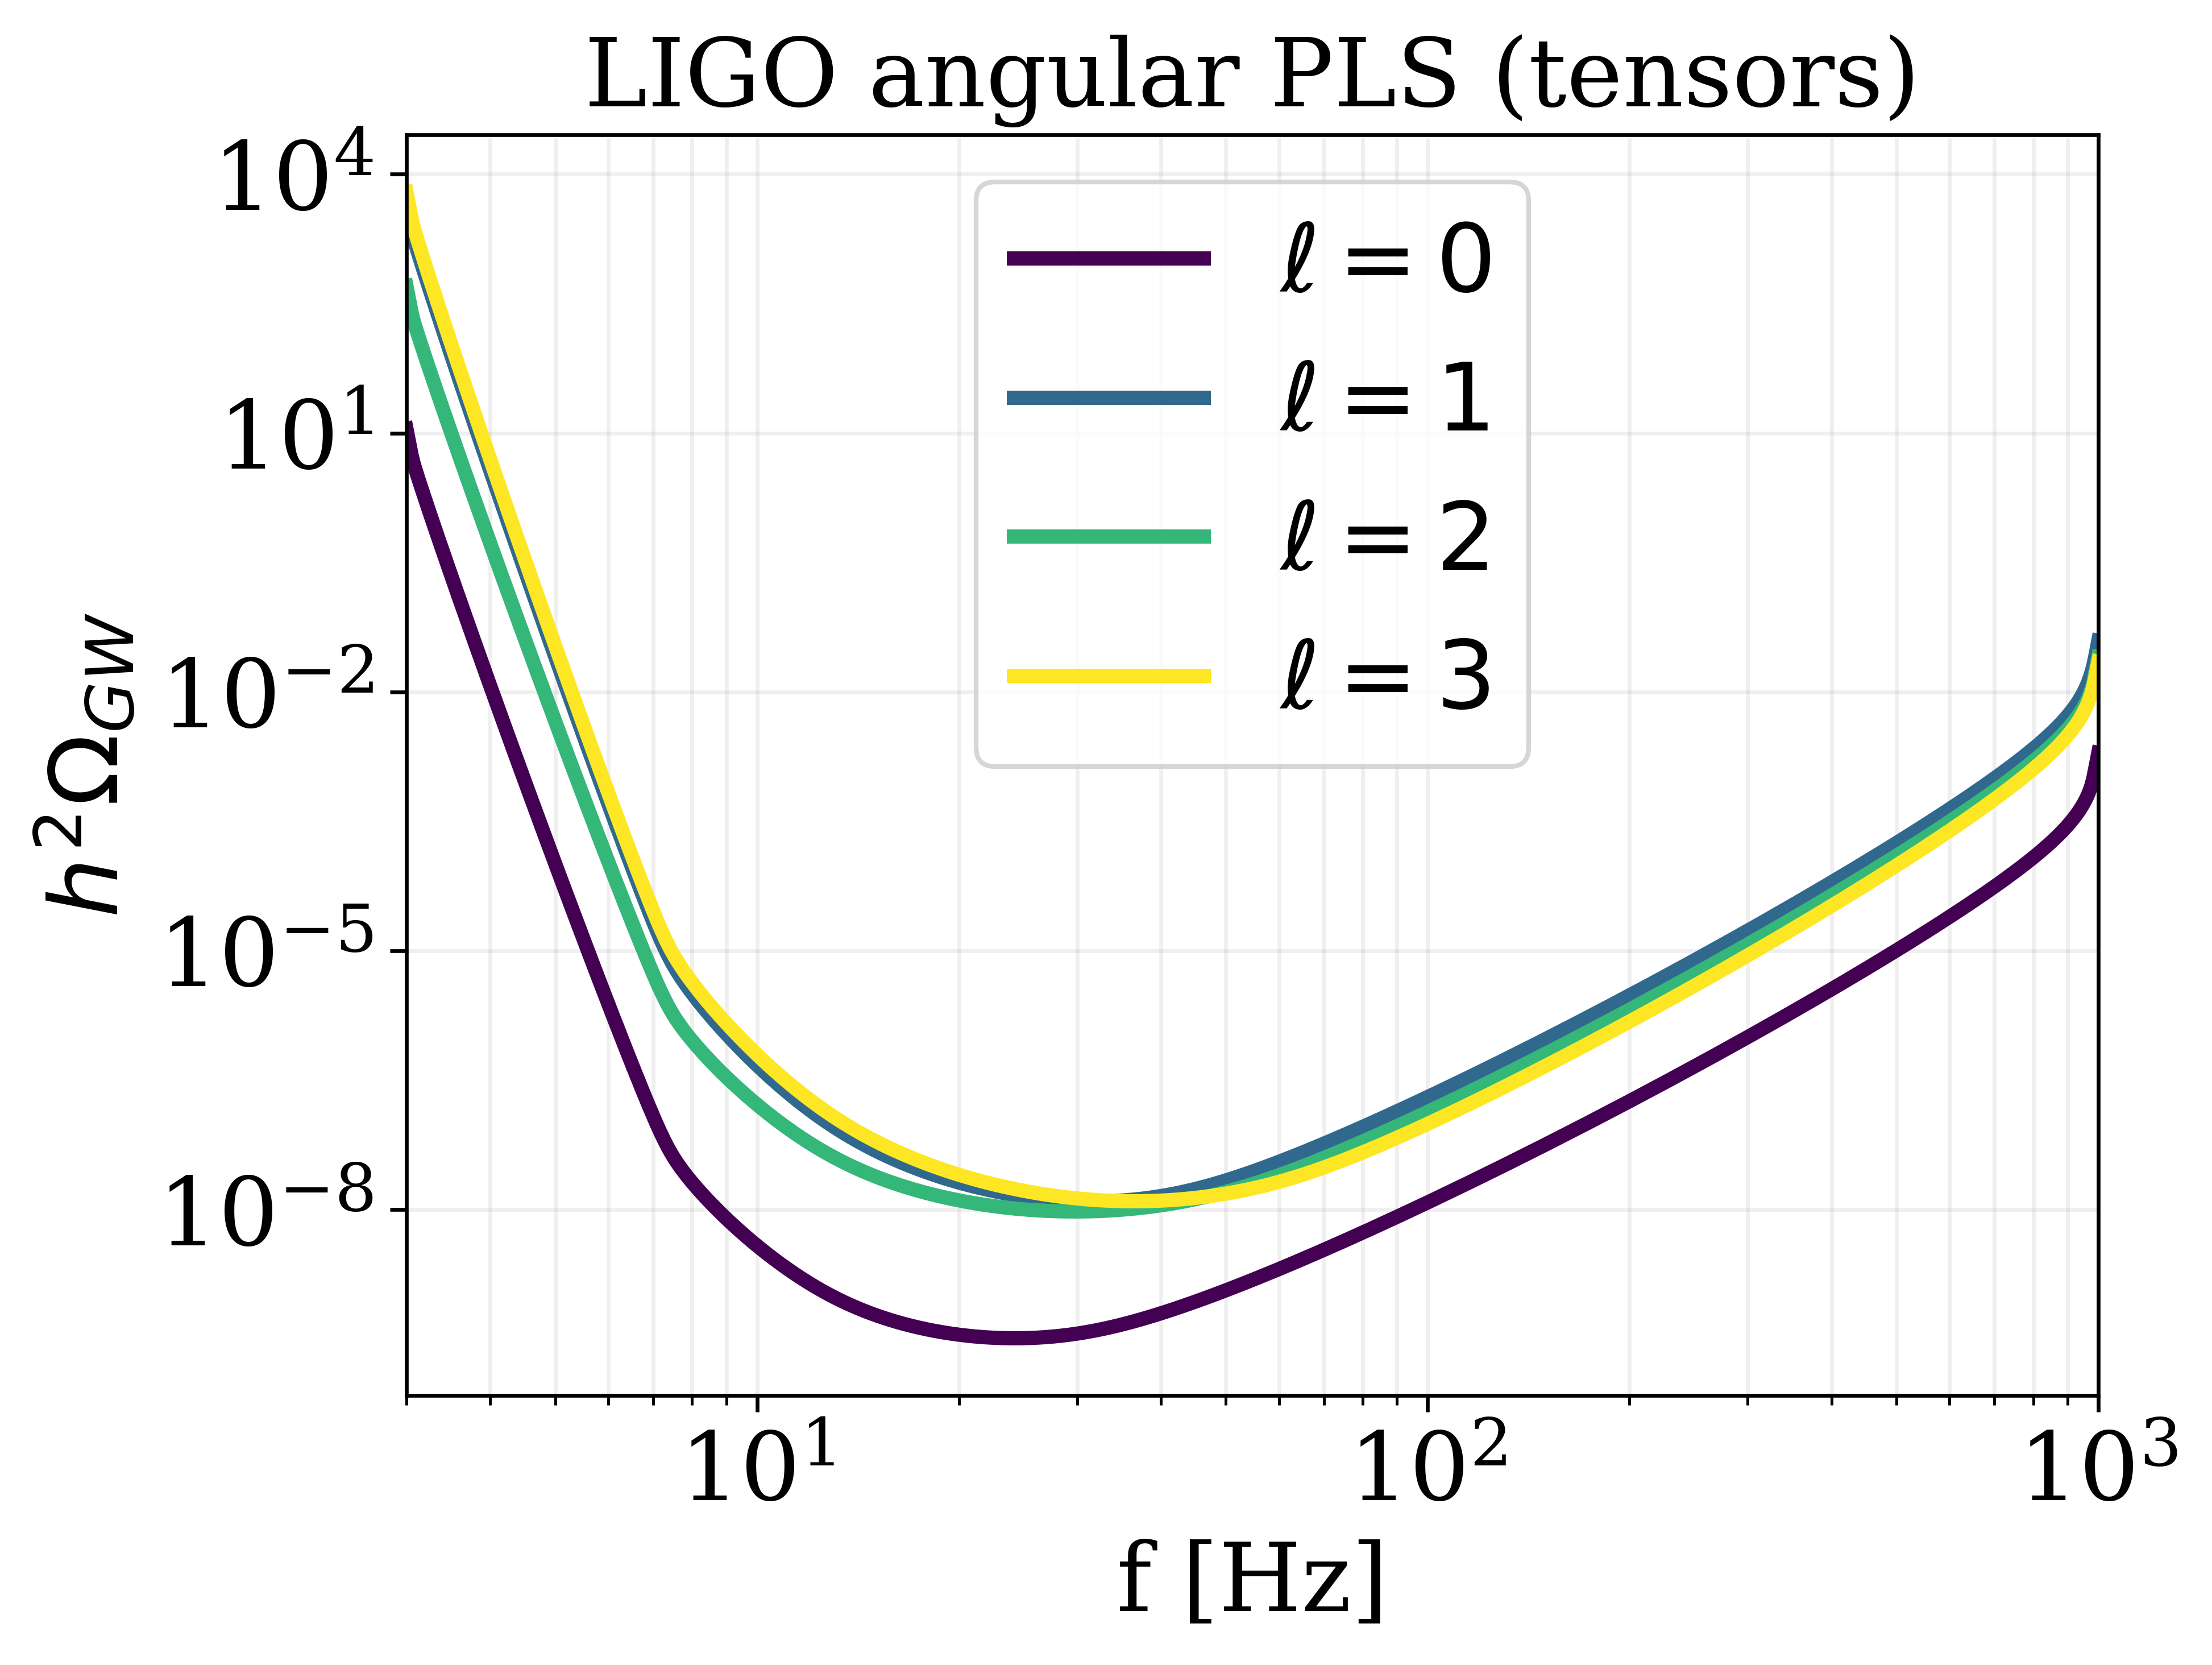

In [62]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls_LIGO_t_0, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls_LIGO_t_1, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls_LIGO_t_2, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls_LIGO_t_3, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title('LIGO angular PLS (tensors)')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()


In [80]:
#vector modes

pls_LIGO_v_0 = Sensitivity_ell.PLS_l('LIGO H', 'LIGO L', R0_v_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1, 't', None)
pls_LIGO_v_1 = Sensitivity_ell.PLS_l('LIGO H', 'LIGO L', R1_v_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)
pls_LIGO_v_2 = Sensitivity_ell.PLS_l('LIGO H', 'LIGO L', R2_v_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)
pls_LIGO_v_3 = Sensitivity_ell.PLS_l('LIGO H', 'LIGO L', R3_v_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)

print(np.min(pls_LIGO_v_0))
print(np.min(pls_LIGO_v_1))
print(np.min(pls_LIGO_v_2))
print(np.min(pls_LIGO_v_3))

4.173707449369712e-10
8.8957785623861e-09
1.0967832849958953e-08
1.728984706803696e-08


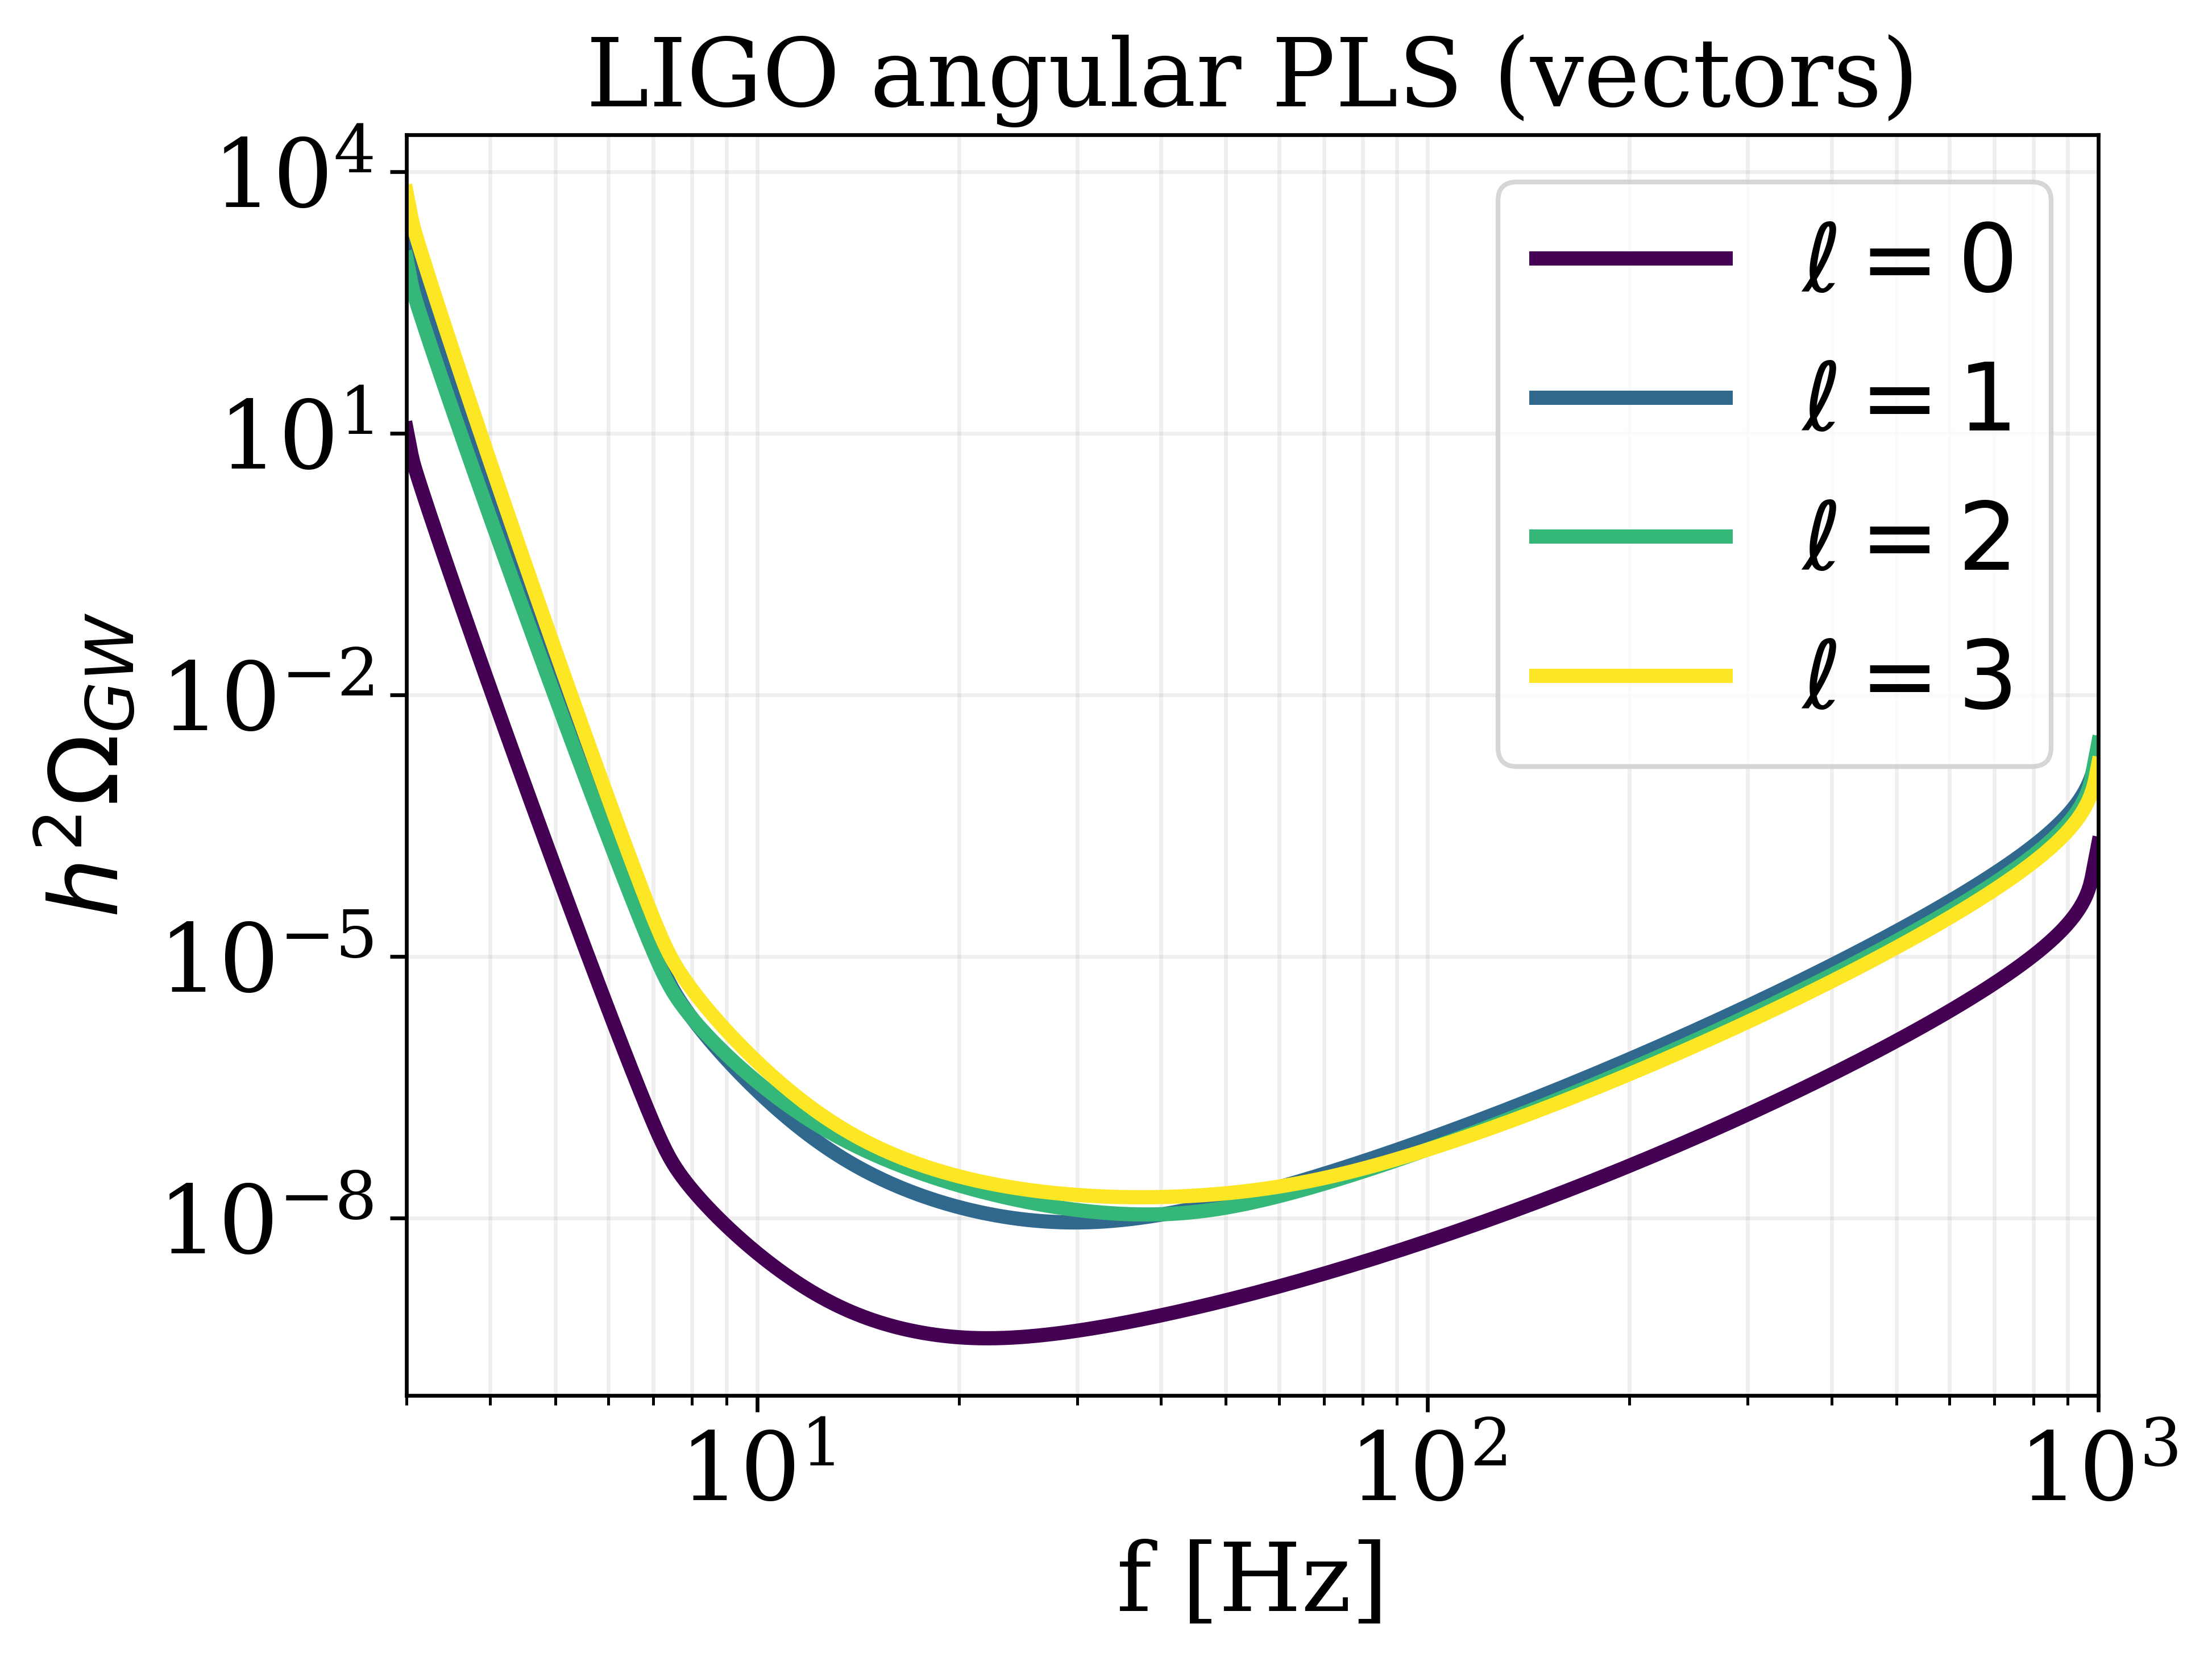

In [81]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls_LIGO_v_0, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls_LIGO_v_1, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls_LIGO_v_2, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls_LIGO_v_3, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title('LIGO angular PLS (vectors)')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()

In [82]:
#scalar modes

pls_LIGO_s_0 = Sensitivity_ell.PLS_l('LIGO H', 'LIGO L', R0_s_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1, 't', None)
pls_LIGO_s_1 = Sensitivity_ell.PLS_l('LIGO H', 'LIGO L', R1_s_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)
pls_LIGO_s_2 = Sensitivity_ell.PLS_l('LIGO H', 'LIGO L', R2_s_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)
pls_LIGO_s_3 = Sensitivity_ell.PLS_l('LIGO H', 'LIGO L', R3_s_LIGO, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 't', None)

print(np.min(pls_LIGO_s_0))
print(np.min(pls_LIGO_s_1))
print(np.min(pls_LIGO_s_2))
print(np.min(pls_LIGO_s_3))

4.400374441077008e-10
7.466539730878057e-09
1.0850993786731176e-08
9.520699651989173e-09


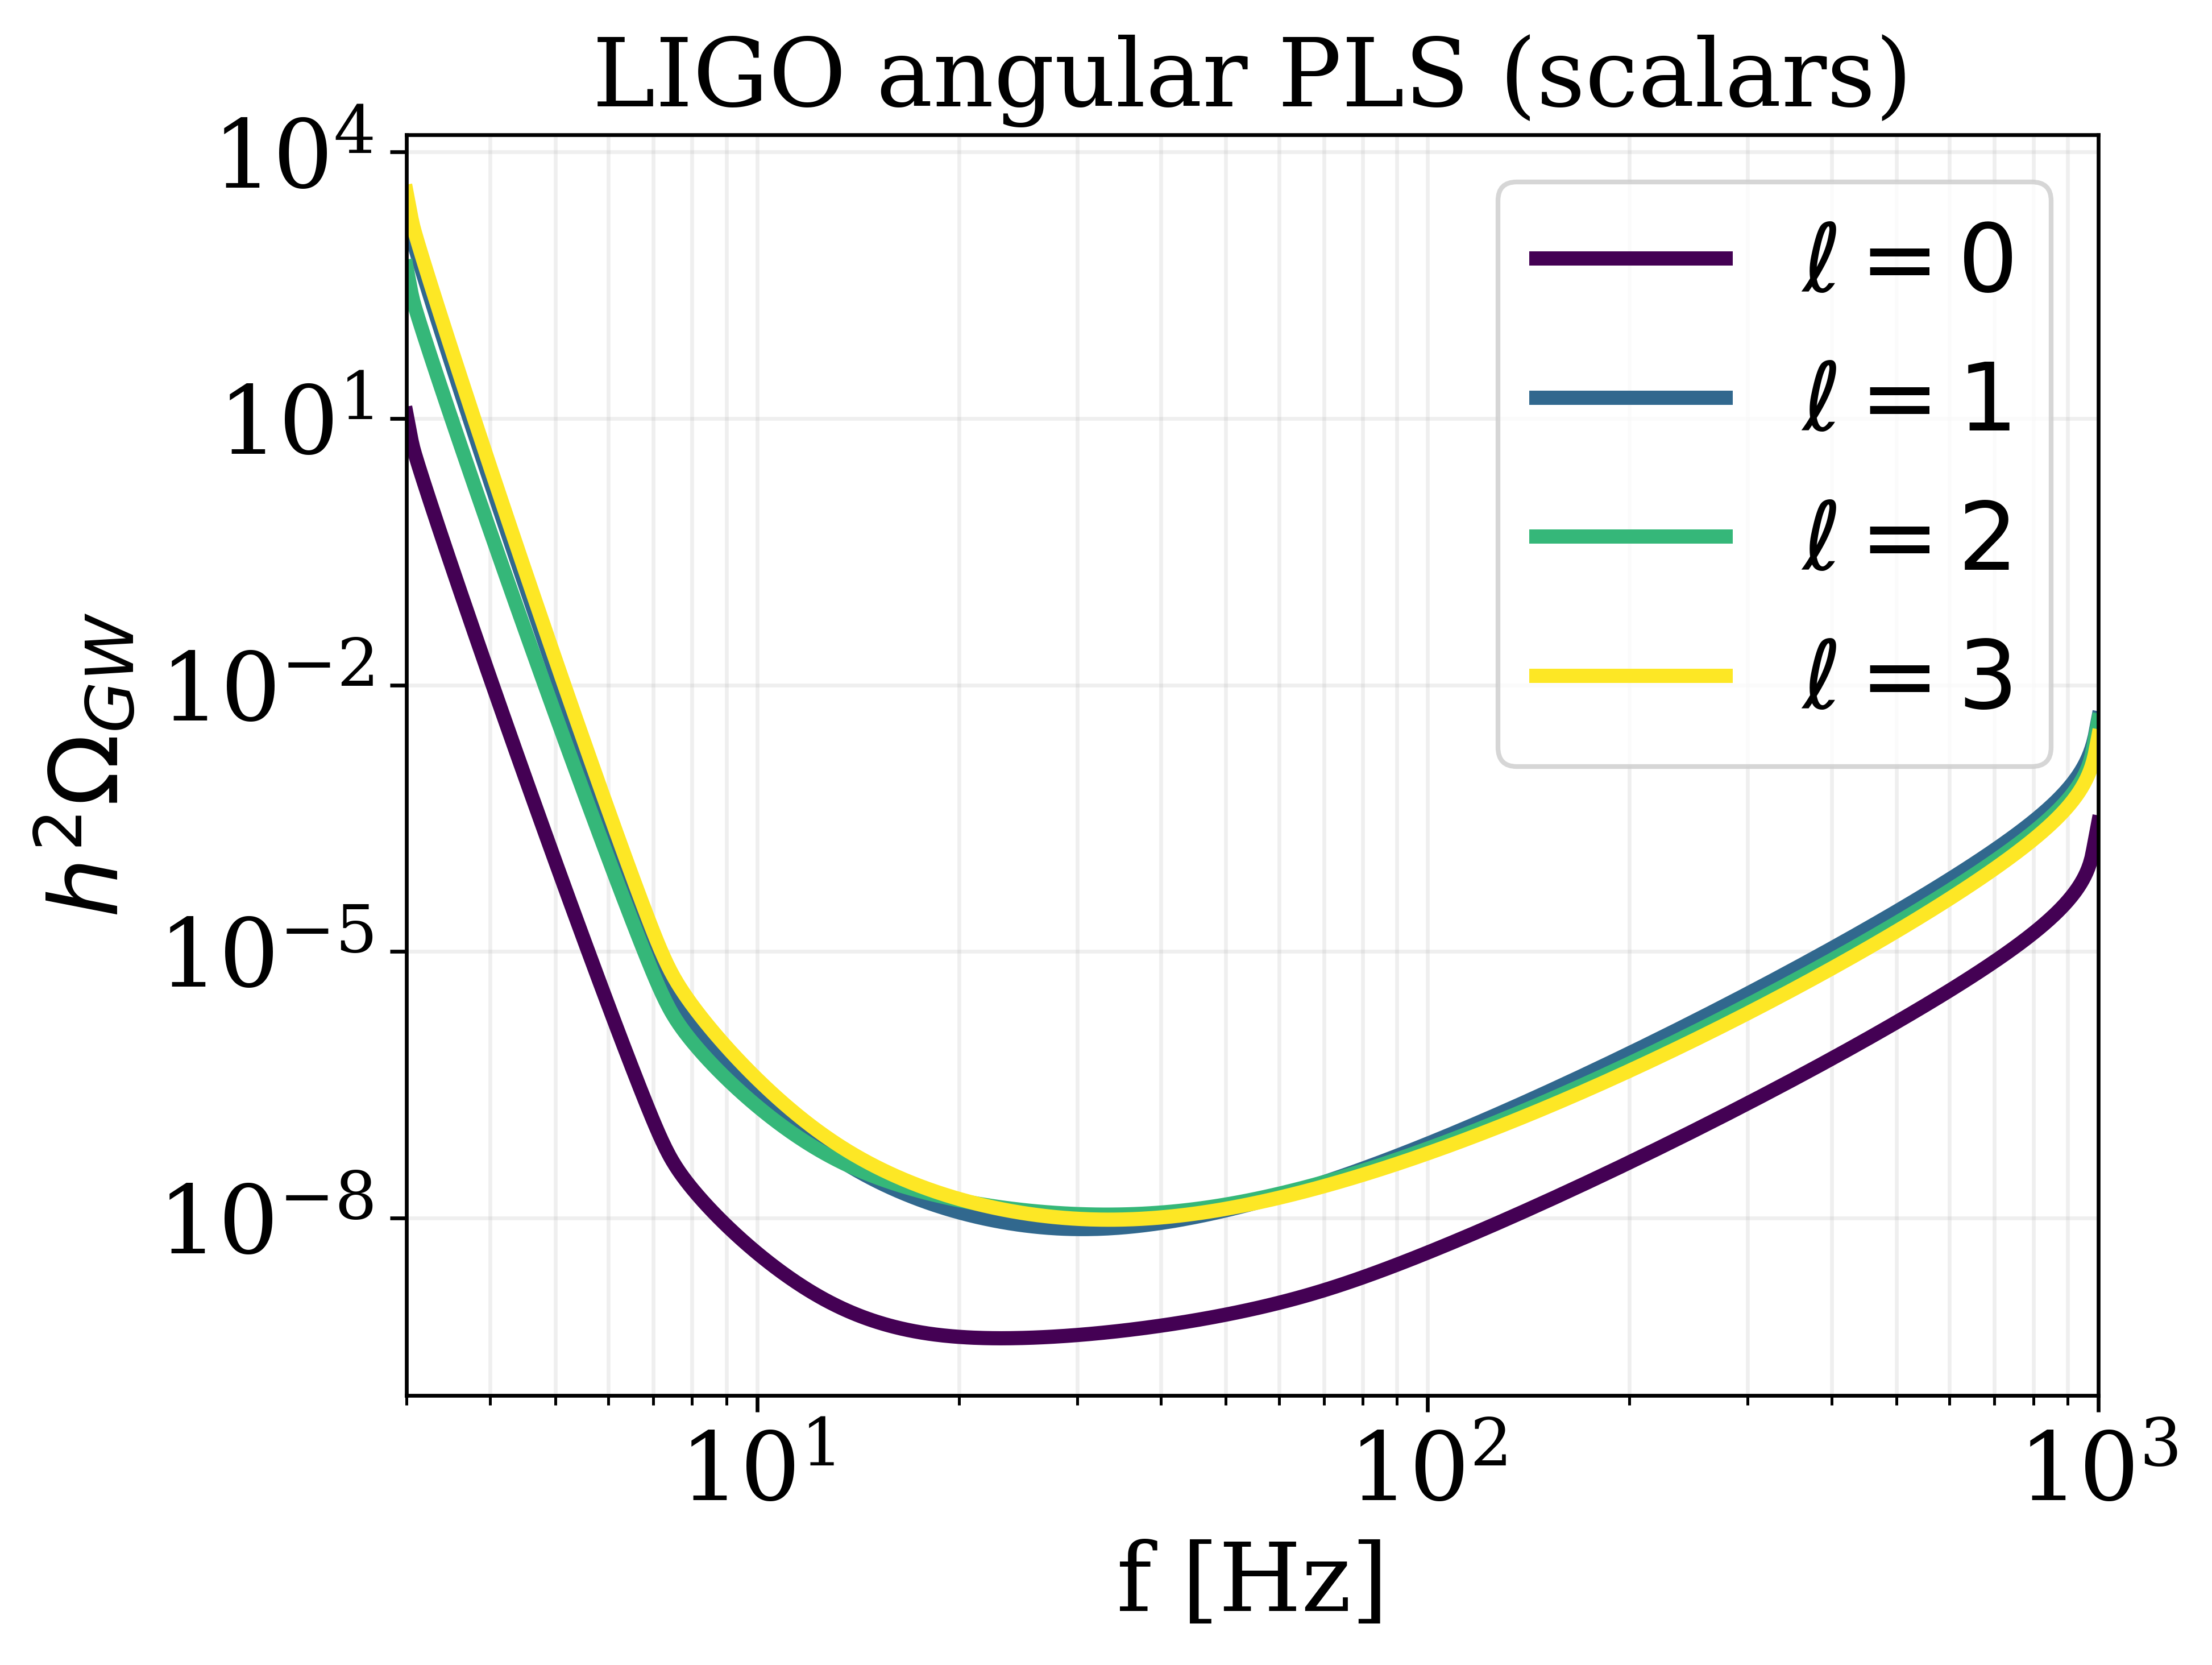

In [83]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls_LIGO_s_0, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls_LIGO_s_1, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls_LIGO_s_2, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls_LIGO_s_3, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.title('LIGO angular PLS (scalars)')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()

* LIGO + Virgo sensitivity to X polarization

In [84]:
f = np.logspace(np.log10(3), np.log10(1000), 1000)

fref = 25
snr = 5
Tobs = 5
beta_min = -40
beta_max = 40

pls_tv_LIGOVirgo = pls.PLS_2pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_ts_LIGOVirgo = pls.PLS_2pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

In [68]:
print(np.min(pls_tv_LIGOVirgo))
print(np.min(pls_ts_LIGOVirgo))

5.655411170786645e-09
3.1965758507221478e-09


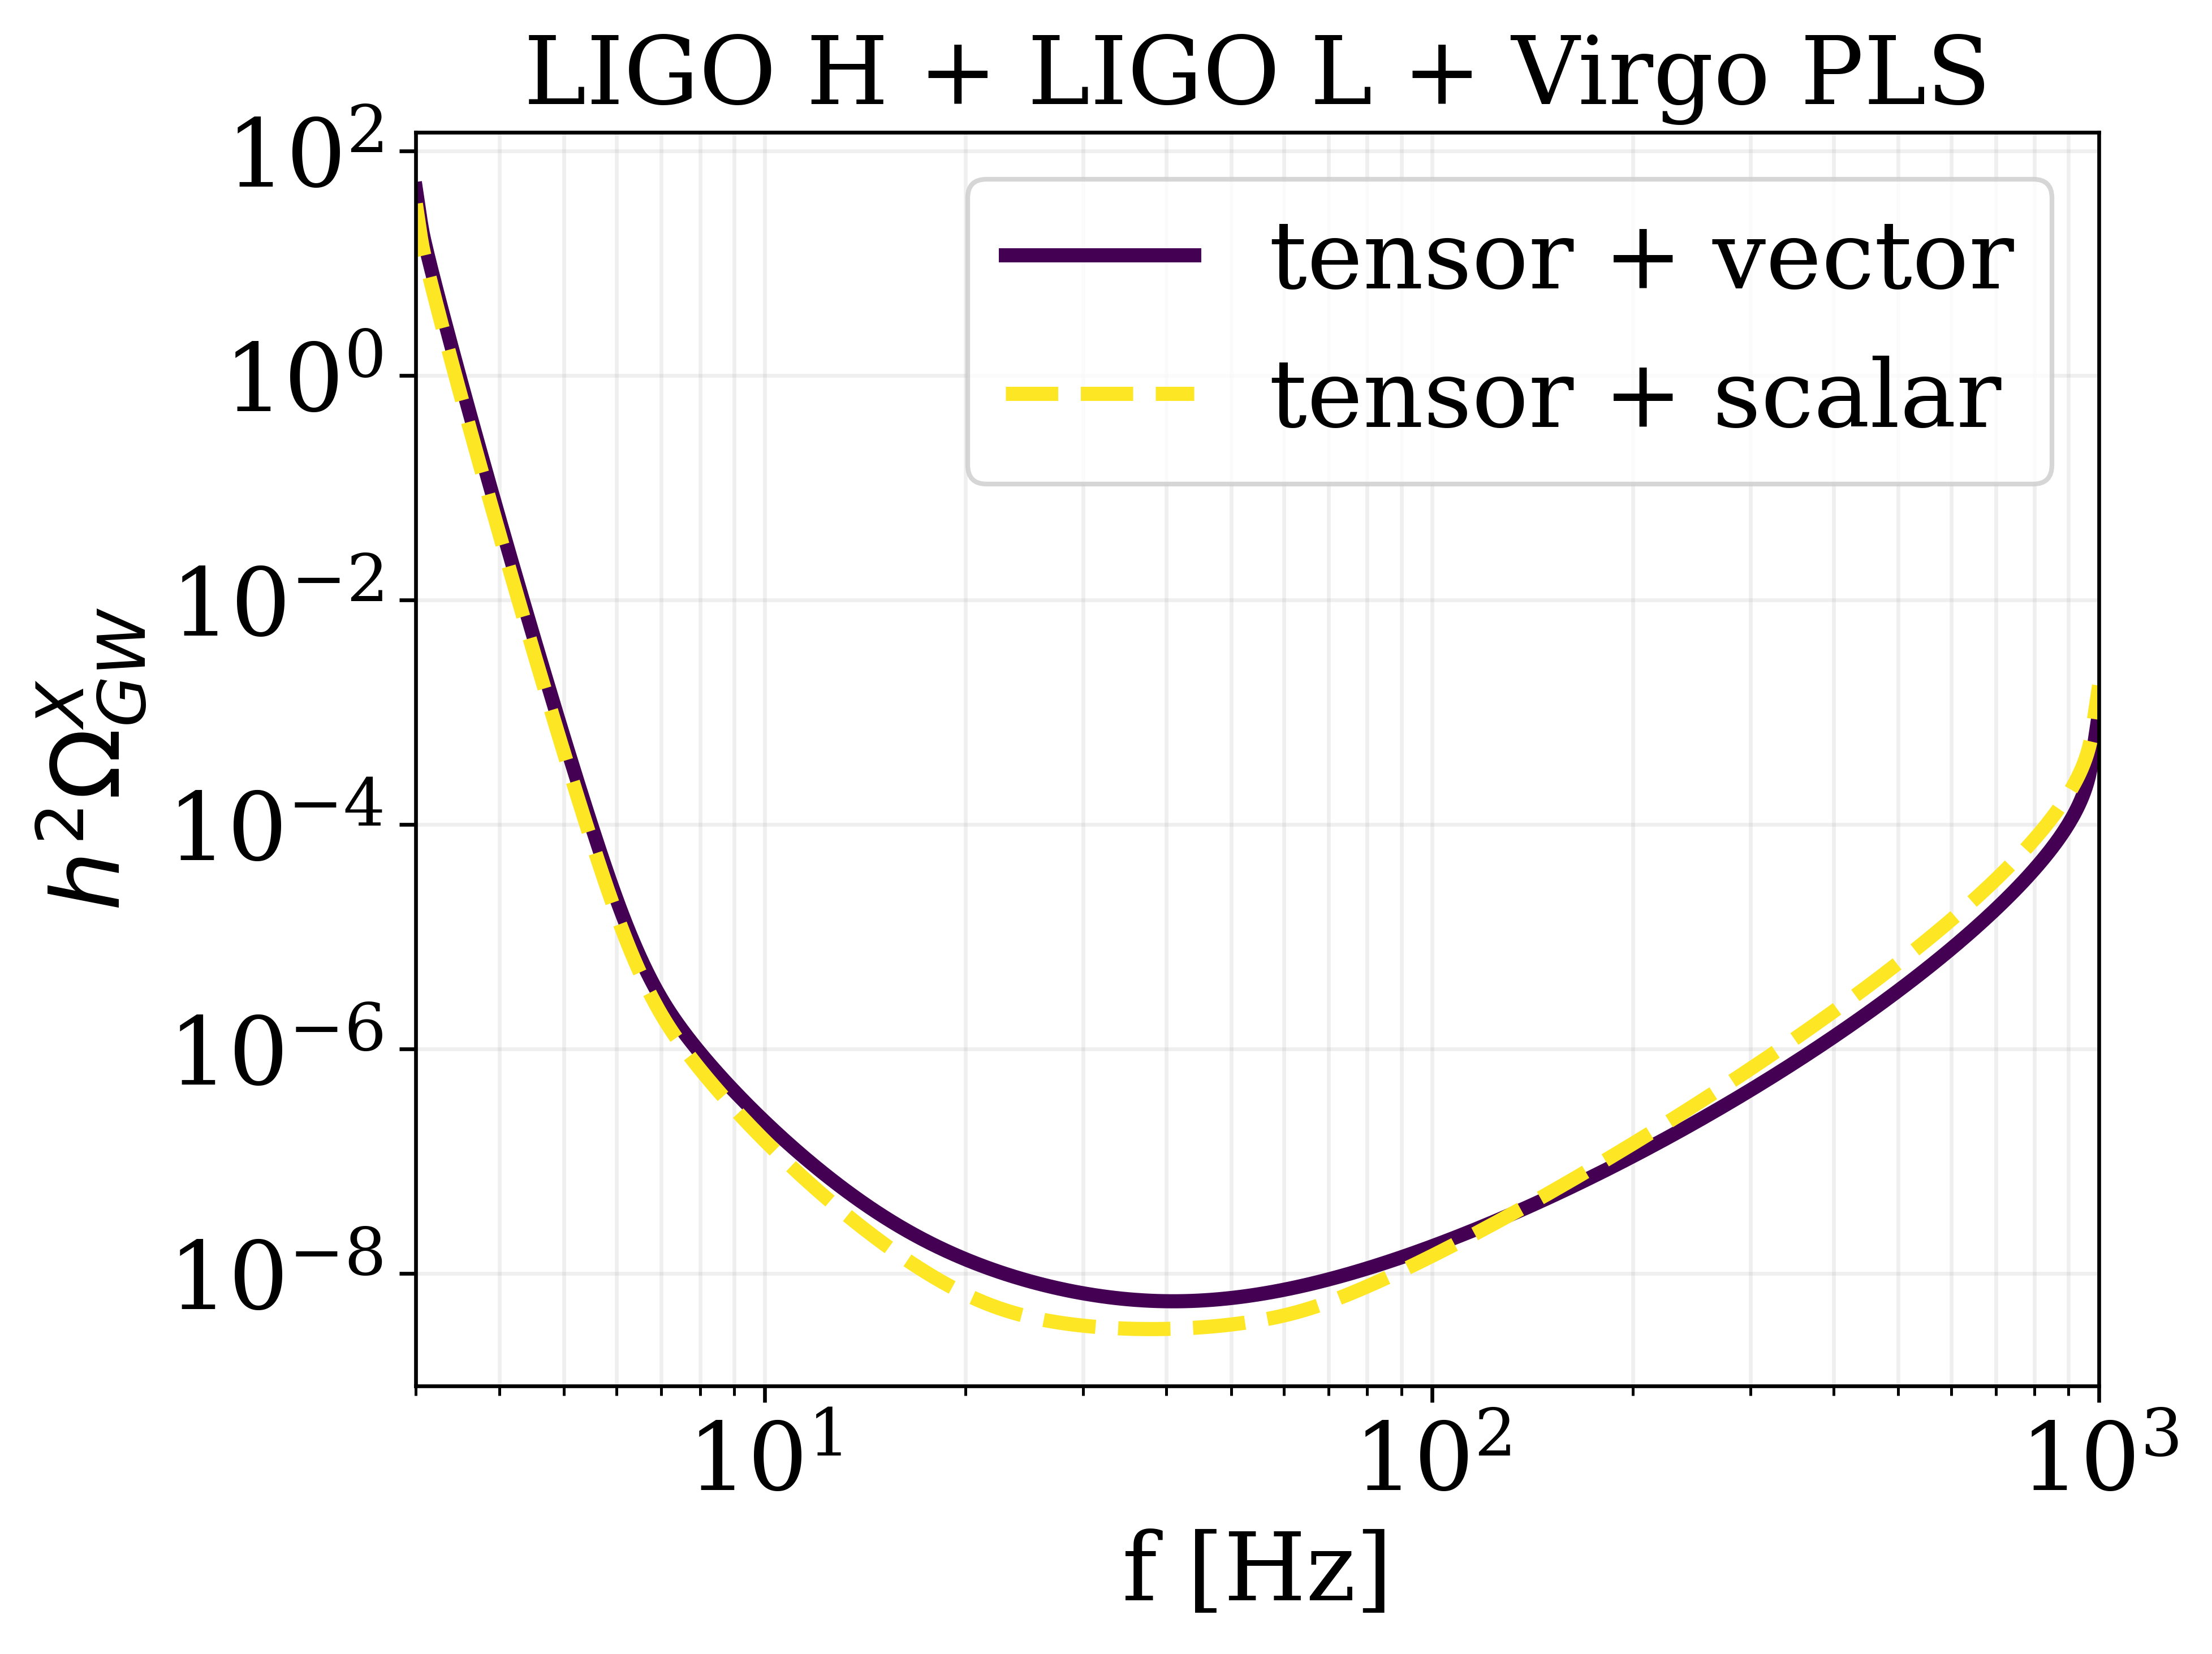

In [85]:
colors = plt.cm.viridis(np.linspace(0, 1, 2))
plt.plot(f, pls_tv_LIGOVirgo, label='tensor + vector', color=colors[0], rasterized=True)
plt.plot(f, pls_ts_LIGOVirgo, label='tensor + scalar', linestyle='--', color=colors[1], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}^X$')
plt.title(r'LIGO H + LIGO L + Virgo PLS')
plt.grid(alpha=0.2, which='both')
plt.xlim(3, 1000)
plt.legend()

In [86]:
pls_t_LIGOVirgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 't', snr, Tobs, beta_min, beta_max, None)
pls_v_LIGOVirgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 'v', snr, Tobs, beta_min, beta_max, None)
pls_s_LIGOVirgo = pls.PLS_3pol('LIGO H', 'LIGO L', 'Virgo', f, fref, 's', snr, Tobs, beta_min, beta_max, None)

In [89]:
print(np.min(pls_t_LIGOVirgo))
print(np.min(pls_v_LIGOVirgo))
print(np.min(pls_s_LIGOVirgo))

5.169044211126727e-09
1.1669921809059095e-08
4.3205052355802465e-09


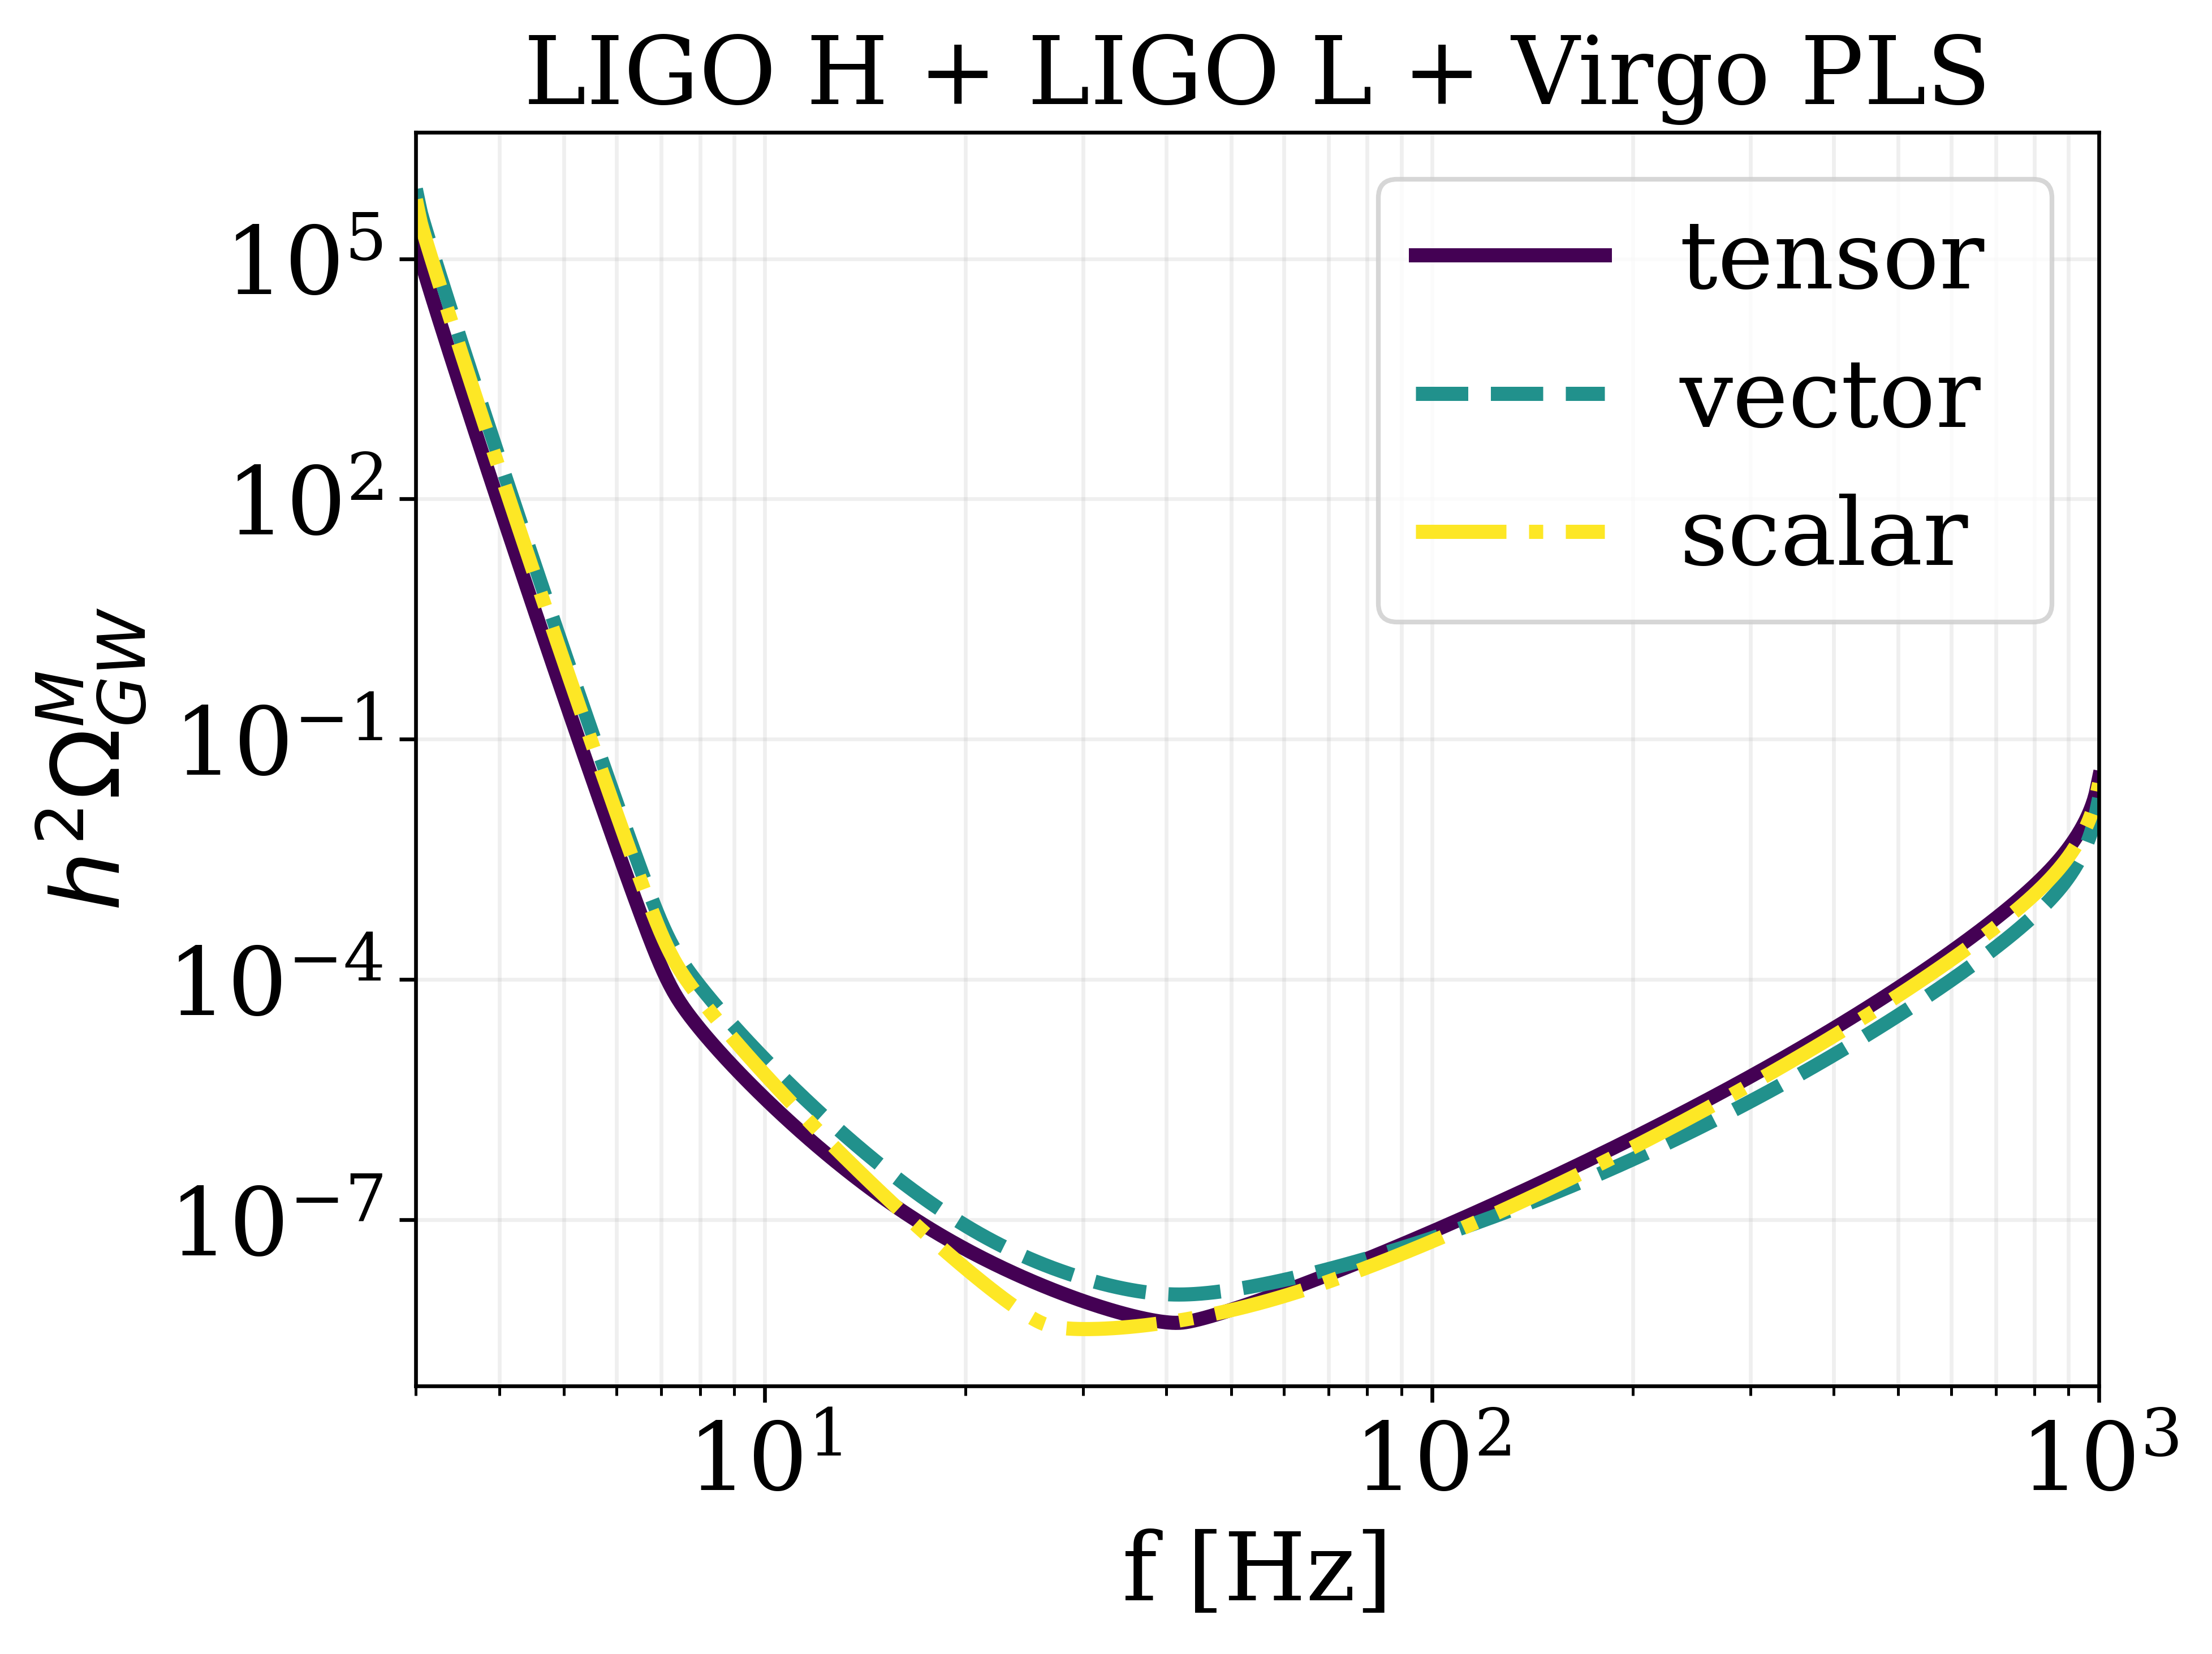

In [90]:
colors = plt.cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, pls_t_LIGOVirgo, label='tensor ', color=colors[0], rasterized=True)
plt.plot(f, pls_v_LIGOVirgo, label='vector', linestyle='--', color=colors[1], rasterized=True)
plt.plot(f, pls_s_LIGOVirgo, label='scalar', linestyle='-.', color=colors[2], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}^M$')
plt.title(r'LIGO H + LIGO L + Virgo PLS')
plt.xlim(3, 1000)
plt.grid(alpha=0.2, which='both')
plt.legend()